# Modules

In [20]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [21]:
df = pd.read_csv('./dataset/diabetes_binary_balanced.csv')

# Data Exploration

In [22]:
df.head()

,Diabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseOrAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GeneralHealth,MentalHealth,PhysicalHealth,DiffWalk,Sex,Age,Education,Income
0,0.0,1,0.0,1,33.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,15.0,0.0,1.0,1,7,6.0,9.0
1,0.0,0,1.0,1,27.0,1.0,0.0,0.0,1,0,...,1,0.0,2.0,1.0,2.0,0.0,1,7,6.0,6.0
2,0.0,0,1.0,1,26.0,1.0,0.0,0.0,0,0,...,1,0.0,3.0,0.0,30.0,0.0,1,13,4.0,3.0
3,0.0,0,0.0,1,19.0,1.0,0.0,0.0,1,1,...,1,0.0,3.0,0.0,0.0,0.0,0,11,5.0,7.0
4,0.0,1,0.0,1,37.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,0.0,0.0,0.0,0,5,5.0,3.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67136 entries, 0 to 67135
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes              67136 non-null  float64
 1   HighBP                67136 non-null  int64  
 2   HighChol              67136 non-null  float64
 3   CholCheck             67136 non-null  int64  
 4   BMI                   67136 non-null  float64
 5   Smoker                67136 non-null  float64
 6   Stroke                67136 non-null  float64
 7   HeartDiseaseOrAttack  67136 non-null  float64
 8   PhysActivity          67136 non-null  int64  
 9   Fruits                67136 non-null  int64  
 10  Veggies               67136 non-null  int64  
 11  Alcoholic             67136 non-null  int64  
 12  AnyHealthcare         67136 non-null  int64  
 13  NoDocbcCost           67136 non-null  float64
 14  GeneralHealth         67136 non-null  float64
 15  MentalHealth       

In [24]:
df.describe()

,Diabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseOrAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GeneralHealth,MentalHealth,PhysicalHealth,DiffWalk,Sex,Age,Education,Income
count,67136.000000,67136.000000,67136.000000,67136.000000,67136.000000,67136.000000,67136.000000,67136.000000,67136.000000,67136.000000,...,67136.000000,67136.000000,67136.000000,67136.000000,67136.000000,67136.000000,67136.000000,67136.000000,67136.000000,67136.000000
mean,0.500000,0.548320,0.500238,0.976227,30.288340,0.440151,0.058866,0.136633,0.717260,0.605919,...,0.967260,0.066522,2.774756,4.230845,5.136752,0.231202,0.493431,8.501743,5.035912,6.563885
std,0.500004,0.497663,0.500004,0.152341,7.095737,0.496409,0.235375,0.343462,0.450334,0.488656,...,0.177955,0.249194,1.073759,8.323138,9.593837,0.421605,0.499961,3.019624,0.981610,2.422641
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,5.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,7.000000
75%,1.000000,1.000000,1.000000,1.000000,34.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,4.000000,5.000000,0.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,11.000000


# Data Preprocessing

In [25]:
cols_to_scale = ["BMI", "GeneralHealth", "MentalHealth", "PhysicalHealth", "Age", "Education", "Income"]

In [26]:
X = df.drop('Diabetes', axis=1)
y = df["Diabetes"]

In [27]:
X.shape, y.shape

((67136, 21), (67136,))

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

In [29]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60422, 21), (6714, 21), (60422,), (6714,))

In [30]:
scaler = StandardScaler()

X_train_scaled_features = scaler.fit_transform(X_train[cols_to_scale])
X_test_scaled_features = scaler.transform(X_test[cols_to_scale])

In [31]:
X_train_scaled_features.shape, X_test_scaled_features.shape

((60422, 7), (6714, 7))

In [32]:
X_train_non_scaled = X_train.drop(cols_to_scale, axis=1).reset_index(drop=True)
X_train_scaled_df = pd.DataFrame(X_train_scaled_features, columns=cols_to_scale).reset_index(drop=True)
X_train_processed = pd.concat([X_train_non_scaled, X_train_scaled_df], axis=1)

X_test_non_scaled = X_test.drop(cols_to_scale, axis=1).reset_index(drop=True)
X_test_scaled_df = pd.DataFrame(X_test_scaled_features, columns=cols_to_scale).reset_index(drop=True)
X_test_processed = pd.concat([X_test_non_scaled, X_test_scaled_df], axis=1)

In [33]:
X_train_processed.shape, X_test_processed.shape

((60422, 21), (6714, 21))

# Data Modeling

In [34]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_processed.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [35]:
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=1e-4),
    metrics=['accuracy']
)

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                1408      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,521
Trainable params: 3,521
Non-trainable params: 0
_________________________________________________________________


# Model Training

In [37]:
history = model.fit(
    X_train_processed,
    y_train,
    epochs=12,
    batch_size=64,
    validation_split=0.2
)

Epoch 1/12
756/756 [==============================] - 3s 3ms/step - loss: 0.5689 - accuracy: 0.7094 - val_loss: 0.5389 - val_accuracy: 0.7283
Epoch 2/12
756/756 [==============================] - 2s 3ms/step - loss: 0.5244 - accuracy: 0.7414 - val_loss: 0.5308 - val_accuracy: 0.7322
Epoch 3/12
756/756 [==============================] - 2s 3ms/step - loss: 0.5191 - accuracy: 0.7447 - val_loss: 0.5276 - val_accuracy: 0.7348
Epoch 4/12
756/756 [==============================] - 2s 3ms/step - loss: 0.5164 - accuracy: 0.7463 - val_loss: 0.5258 - val_accuracy: 0.7354
Epoch 5/12
756/756 [==============================] - 2s 3ms/step - loss: 0.5144 - accuracy: 0.7469 - val_loss: 0.5247 - val_accuracy: 0.7364
Epoch 6/12
756/756 [==============================] - 2s 3ms/step - loss: 0.5133 - accuracy: 0.7477 - val_loss: 0.5237 - val_accuracy: 0.7382
Epoch 7/12
756/756 [==============================] - 2s 3ms/step - loss: 0.5123 - accuracy: 0.7485 - val_loss: 0.5238 - val_accuracy: 0.7379
Epoch 

# Model Evaluation

In [38]:
def plot_training_history(history):
    train_loss = history.history['loss']
    train_acc = history.history['accuracy']
    val_loss = history.history['val_loss']
    val_acc = history.history['val_accuracy']

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

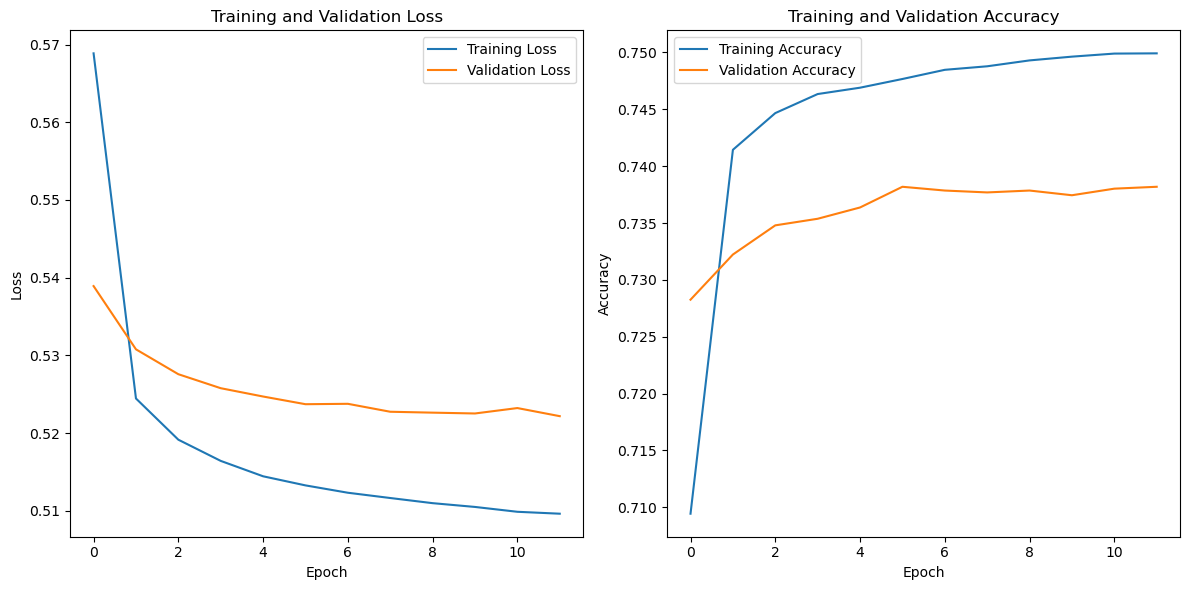

In [39]:
plot_training_history(history)

210/210 [==============================] - 0s 1ms/step


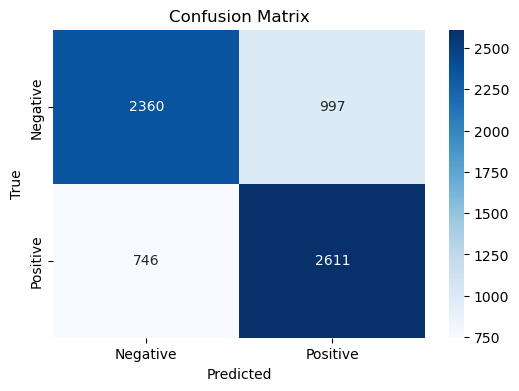

Precision: 0.7237
Recall: 0.7778
F1 Score: 0.7497


In [40]:
y_pred = model.predict(X_test_processed)

y_pred_classes = (y_pred[:, 0] > 0.5).astype(int)
y_test_classes = y_test

conf_mat = confusion_matrix(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes)
recall = recall_score(y_test_classes, y_pred_classes)
f1 = f1_score(y_test_classes, y_pred_classes)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')